In [1]:
import keras
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, Convolution2D, Flatten,Dropout,MaxPooling2D, Activation
from keras.layers import Reshape, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils
import cv2

Using Theano backend.


In [4]:
import os
path='./datasets/catsdogs/'
data=os.listdir(path)
images=[]
for ix in range(len(data)):
    img=cv2.imread(path+data[ix])
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(64,64))
    images.append(img)
images=np.array(images)
print images.shape

(25000, 64, 64, 3)


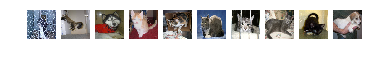

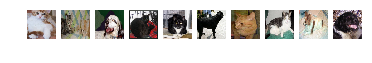

In [7]:
np.random.shuffle(images)
for ix in range(20):
    plt.figure(ix/10)
    plt.subplot(1,10,(ix%10)+1)
    plt.imshow(images[ix])
    plt.axis('off')

In [20]:
y_data=[]

for ix in range(images.shape[0]):
    y_data.append(cv2.cvtColor(images[ix],cv2.COLOR_RGB2GRAY).reshape(64,64,1))
y_data=np.array(y_data)
print y_data.shape

(25000, 64, 64, 1)


In [30]:
print y_data[0].shape

(64, 64, 1)


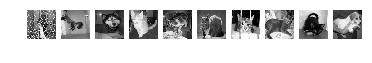

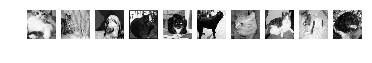

In [11]:
for ix in range(20):
    plt.figure(ix/10)
    plt.subplot(1,10,(ix%10)+1)
    plt.imshow(y_data[ix],cmap='gray')
    plt.axis('off')

In [26]:
X_data = images[:10000]
y_data = y_data[:10000]


split=int(0.85*X_data.shape[0])


X_train= X_data[:split,:]/255.0
y_train= y_data[:split]/255.0
X_test=X_data[split:,:]/255.0
y_test= y_data[split:]/255.0
print X_train.shape, X_test.shape
print y_train.shape, y_test.shape

(8500, 64, 64, 3) (1500, 64, 64, 3)
(8500, 64, 64, 1) (1500, 64, 64, 1)


In [23]:
model=Sequential()
model.add(Convolution2D(64,3,3,input_shape=(64,64,1),activation='relu'))
model.add(Convolution2D(128,3,3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,5,5,activation='relu'))
model.add(Convolution2D(16,3,3,activation='relu'))


model.add(ZeroPadding2D(padding=(1, 1)))
model.add(Convolution2D(32, 3, 3, border_mode='same', activation='relu'))

model.add(ZeroPadding2D(padding=(2, 2)))
model.add(Convolution2D(64, 5, 5, border_mode='same', activation='relu'))

model.add(UpSampling2D(size=(2, 2)))

model.add(ZeroPadding2D(padding=(1, 1)))
model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu'))

model.add(ZeroPadding2D(padding=(1, 1)))
model.add(Convolution2D(3, 3, 3, border_mode='same', activation='relu'))

model.summary()
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

(Subtensor{int64}.0, Elemwise{add,no_inplace}.0, Elemwise{add,no_inplace}.0, Subtensor{int64}.0)
(Subtensor{int64}.0, Elemwise{add,no_inplace}.0, Elemwise{add,no_inplace}.0, Subtensor{int64}.0)
(Subtensor{int64}.0, Elemwise{add,no_inplace}.0, Elemwise{add,no_inplace}.0, Subtensor{int64}.0)
(Subtensor{int64}.0, Elemwise{add,no_inplace}.0, Elemwise{add,no_inplace}.0, Subtensor{int64}.0)
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_9 (Convolution2D)  (None, 62, 62, 64)    640         convolution2d_input_2[0][0]      
____________________________________________________________________________________________________
convolution2d_10 (Convolution2D) (None, 60, 60, 128)   73856       convolution2d_9[0][0]            
____________________________________________________________________________________________________
maxpoo

In [27]:
hist = model.fit(y_train,X_train,
                      nb_epoch=2,
                      shuffle=True,
                      batch_size=100,
                      validation_data=(y_test,X_test))

Train on 8500 samples, validate on 1500 samples
Epoch 1/2
8500/8500 [==============================] - 1556s - loss: 0.0391 - acc: 0.5707 - val_loss: 0.0186 - val_acc: 0.6390

KeyboardInterrupt: 

In [28]:
out = model.predict(y_train[:100])
print out.shape

(100, 64, 64, 3)


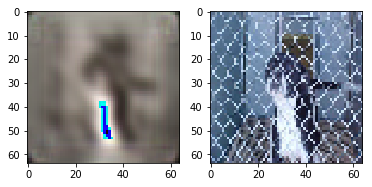

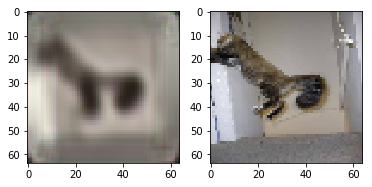

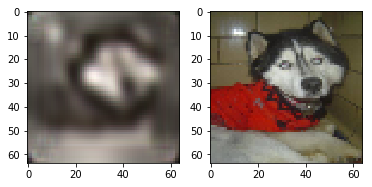

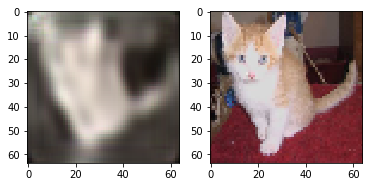

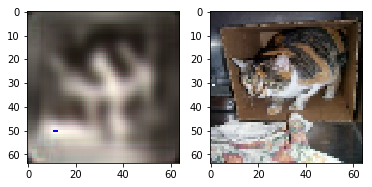

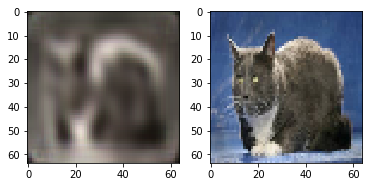

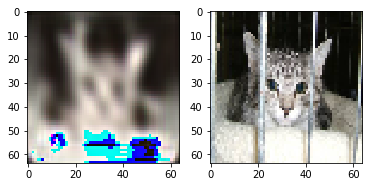

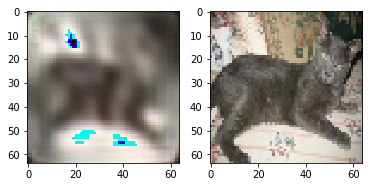

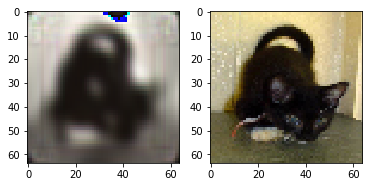

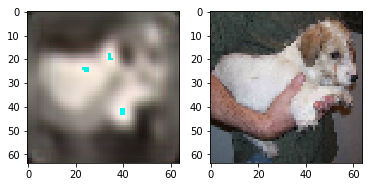

In [29]:
for ix in range(10):
    plt.figure(ix)
    plt.subplot(1, 2, 1)
    plt.imshow(out[ix])
    plt.subplot(1, 2, 2)
    plt.imshow(X_data[ix])
plt.show()